In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

读取数据

In [2]:
# 本地数据地址
path = 'Accton.csv'
# 读取数据
df = pd.read_csv(path)

In [3]:
df_description = df['Description']
df_description.head()

0    u8 value); extern void led_classdev_unregister...
1    The Price to Earnings (P/E) ratio, a key valua...
2    A highly anticipated interest-rate decision by...
3    DRIVER NEEDED: <b>accton</b> <b>accton</b> pci...
4    Edgecore will be separate from SMC Networks, a...
Name: Description, dtype: object

数据清洗

In [4]:
# 数据清洗与预处理
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stopwords.words('english')]
    return ' '.join(tokens)

df['ProcessedDescription'] = df_description.apply(preprocess_text)
df['ProcessedDescription'].head()

0    value extern void struct extern void struct ex...
1    price earnings ratio key valuation measure cal...
2    highly anticipated decision federal reserve we...
3    driver needed b accton b accton pci ethernet c...
4    edgecore separate smc networks although remain...
Name: ProcessedDescription, dtype: object

导入bert模型

In [5]:
specific_model = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")

/opt/anaconda3/envs/pyt/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
#导入数据到模型里
data = df['ProcessedDescription'].tolist()
ans=specific_model(data)
ans

[{'label': '1 star', 'score': 0.538558840751648},
 {'label': '3 stars', 'score': 0.31008586287498474},
 {'label': '4 stars', 'score': 0.23607000708580017},
 {'label': '4 stars', 'score': 0.31141918897628784},
 {'label': '3 stars', 'score': 0.3038923442363739},
 {'label': '4 stars', 'score': 0.36624234914779663},
 {'label': '4 stars', 'score': 0.2652154266834259},
 {'label': '4 stars', 'score': 0.3343838155269623},
 {'label': '5 stars', 'score': 0.36659887433052063},
 {'label': '4 stars', 'score': 0.36390718817710876},
 {'label': '3 stars', 'score': 0.2544254660606384},
 {'label': '4 stars', 'score': 0.2877124547958374},
 {'label': '5 stars', 'score': 0.42241370677948},
 {'label': '5 stars', 'score': 0.3324807584285736},
 {'label': '2 stars', 'score': 0.33579644560813904},
 {'label': '4 stars', 'score': 0.39127203822135925}]

In [7]:
#创建label列表
label_list = []
#摘取label
for i in ans:
    label_list.append(int(i['label'][0]))
df['label'] = label_list
df.head()

,Title,Description,URL,Provider,Date Published,ProcessedDescription,label
0,<b>accton</b>_as7726_32x_leds.c,u8 value); extern void led_classdev_unregister...,https://github.com/sonic-net/sonic-buildimage/...,GitHub,2022-11-21T10:44:00.0000000Z,value extern void struct extern void struct ex...,1
1,<b>Accton Technology Corp</b>.,"The Price to Earnings (P/E) ratio, a key valua...",https://www.wsj.com/market-data/quotes/TW/XTAI...,Wall Street Journal,2024-08-22T23:59:00.0000000Z,price earnings ratio key valuation measure cal...,3
2,<b>Accton</b> Technology Corporation (2345.TW),A highly anticipated interest-rate decision by...,https://finance.yahoo.com/quote/2345.TW/news/,Yahoo Finance,2024-09-13T13:30:00.0000000Z,highly anticipated decision federal reserve we...,4
3,<b>108m Wireless PCI Adapter Drivers</b>,DRIVER NEEDED: <b>accton</b> <b>accton</b> pci...,https://www.globalspec.com/industrial-director...,Engineering360 News,2018-02-12T17:57:00.0000000Z,driver needed b accton b accton pci ethernet c...,4
4,SMC Networks Spins Off Channel-Centric Busines...,"Edgecore will be separate from SMC Networks, a...",https://www.crn.com/news/networking/221400160/...,CRN,2009-11-02T12:00:00.0000000Z,edgecore separate smc networks although remain...,3


制作情感分布图

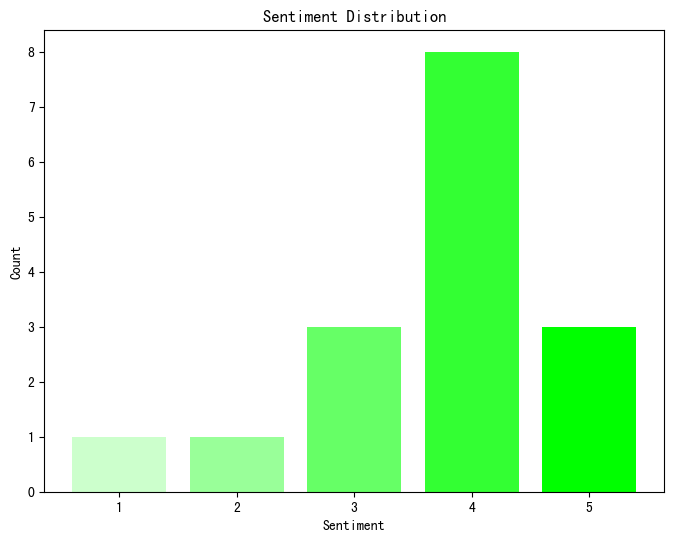

In [8]:
#得到label信息并排序
sentiment_counts = df['label'].value_counts()
sentiment_counts_sorted = sentiment_counts.sort_index()

# 绘制情感分布图
plt.figure(figsize=(8, 6))
colors = [(0, 1, 0, alpha) for alpha in np.linspace(0.2, 1, 5)]
plt.bar(sentiment_counts_sorted.index, sentiment_counts_sorted.values,color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

计算数据集得分

In [9]:
# 计算数据集的总分数
def calculate_dataset_score(dataframe, column_name):
    label_counts = dataframe[column_name].value_counts()
    #总分数
    overall_score = sum(label * count for label, count in label_counts.items()) / len(dataframe)
    #归一化
    dataset_score = overall_score / 5
    return dataset_score

df_score = calculate_dataset_score(df, 'label')
print(f"df 的分数: {df_score}")

df 的分数: 0.7375
